#STT: 16

#Họ và tên: Lưu Quang Tiến Hoàng

#Lớp: DS105.M11.2

#Buổi 03 - Lab4

In [1]:
import pandas as pd
import numpy as np

#Câu 1. Tạo dataframe (df) lưu trữ dataset tại đường dẫn trên (chọn cách đọc load từ internet). Xuất 10 samples bất kỳ. Dataset có bao nhiêu sample, số lượng bao nhiêu feature.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasethub/ds105/master/Model_Dataset_Lab.csv')

In [3]:
df.sample(10)

,Unnamed: 0,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,drive-wheels,price
152,194,3045,130,0.907256,0.933333,162.0,17,22,104.3,3.62,rwd,18420.0
112,44,4066,258,0.959154,0.966667,176.0,15,19,113.0,3.63,rwd,32250.0
51,18,1874,90,0.749159,0.883333,70.0,38,43,94.5,3.03,fwd,6295.0
132,125,2800,194,0.811629,0.902778,207.0,17,25,89.5,3.74,rwd,37028.0
59,24,1989,90,0.755887,0.886111,68.0,31,38,93.7,2.97,fwd,6692.0
141,144,2420,108,0.834214,0.908333,82.0,23,29,96.9,3.62,4wd,8013.0
138,100,3060,181,0.887074,0.923611,152.0,19,25,100.4,3.43,fwd,13499.0
166,11,2710,164,0.849592,0.900000,121.0,21,28,101.2,3.31,rwd,20970.0
124,183,2319,97,0.825084,0.909722,68.0,37,42,97.3,3.01,fwd,9495.0
157,96,2324,120,0.833253,0.905556,97.0,27,34,97.2,3.33,fwd,8949.0


In [5]:
df.shape

(180, 12)

#Câu 2. Kiểm tra kiểu dữ liệu của các feature trong dataset. Dataset có bị khuyết giá trị nào không?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    180 non-null    int64  
 1   curb-weight   180 non-null    int64  
 2   engine-size   180 non-null    int64  
 3   length        180 non-null    float64
 4   width         180 non-null    float64
 5   horsepower    180 non-null    float64
 6   city-mpg      180 non-null    int64  
 7   highway-mpg   180 non-null    int64  
 8   wheel-base    180 non-null    float64
 9   bore          180 non-null    float64
 10  drive-wheels  180 non-null    object 
 11  price         180 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 17.0+ KB


In [7]:
df.dtypes

Unnamed: 0        int64
curb-weight       int64
engine-size       int64
length          float64
width           float64
horsepower      float64
city-mpg          int64
highway-mpg       int64
wheel-base      float64
bore            float64
drive-wheels     object
price           float64
dtype: object

In [18]:
df.isnull().sum()

Unnamed: 0      0
curb-weight     0
engine-size     0
length          0
width           0
horsepower      0
city-mpg        0
highway-mpg     0
wheel-base      0
bore            0
drive-wheels    0
price           0
dtype: int64

# Câu 3. Phát triển mô hình hồi quy đơn biến cho từng feature sau 'curb-weight','engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore'.

In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [12]:
def LR(name):
  X = df[[name]]
  Y = df['price']
  lm.fit(X,Y)
  Yhat = lm.predict(X)
  return lm.intercept_, lm.coef_

In [17]:
for i in ['curb-weight','engine-size', 'length', 'width', 'horsepower','city-mpg', 'highway-mpg', 'wheel-base', 'bore']:
  b0,b1 = LR(i)
  print(i,': b0',b0,'\t b1:',b1,'\n')

curb-weight : b0 -20285.31406500681 	 b1: [13.09108964] 

engine-size : b0 -7731.515031138675 	 b1: [164.49950898] 

length : b0 -67895.10058000361 	 b1: [96774.11308036] 

width : b0 -180847.43608930756 	 b1: [212087.66778645] 

horsepower : b0 -4689.838442408294 	 b1: [172.8131389] 

city-mpg : b0 34877.21471900954 	 b1: [-863.11720334] 

highway-mpg : b0 39083.01543384894 	 b1: [-845.83672401] 

wheel-base : b0 -66954.52897435895 	 b1: [811.27157314] 

bore : b0 -39235.7413077743 	 b1: [15768.68842036] 



#Câu 4. Phát họa regression plot và residual plot cho các feature sau 'curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore'.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Curb-weight

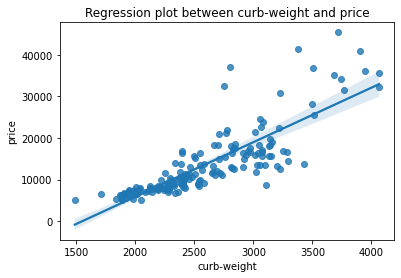

In [20]:
sns.regplot(x=df['curb-weight'], y=df['price']).set_title('Regression plot between curb-weight and price');

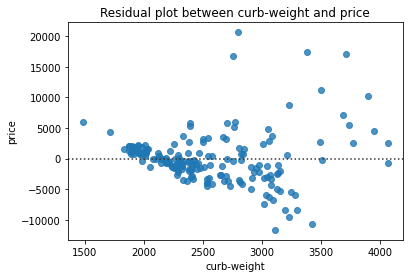

In [21]:
sns.residplot(x=df['curb-weight'], y=df['price']).set_title('Residual plot between curb-weight and price');

# Engine-size

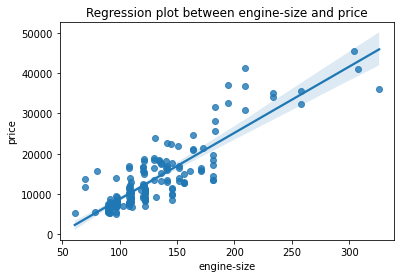

In [22]:
sns.regplot(x=df['engine-size'], y=df['price']).set_title('Regression plot between engine-size and price');

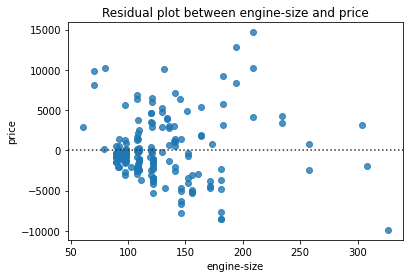

In [23]:
sns.residplot(x=df['engine-size'], y=df['price']).set_title('Residual plot between engine-size and price');


# Length

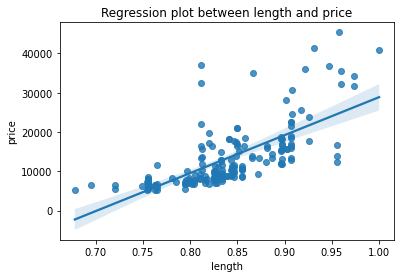

In [24]:
sns.regplot(x=df['length'], y=df['price']).set_title('Regression plot between length and price');

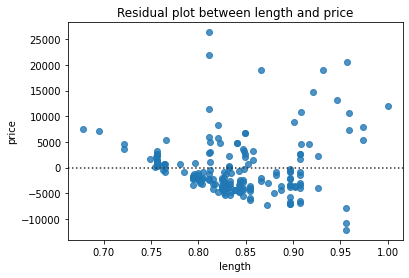

In [25]:
sns.residplot(x=df['length'], y=df['price']).set_title('Residual plot between length and price');

#Width

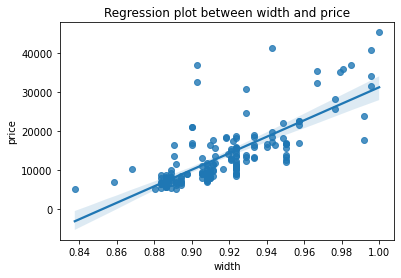

In [26]:
sns.regplot(x=df['width'], y=df['price']).set_title('Regression plot between width and price');

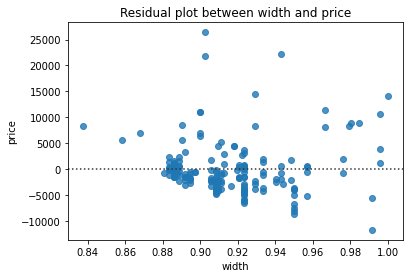

In [27]:
sns.residplot(x=df['width'], y=df['price']).set_title('Residual plot between width and price');

# Horsepower

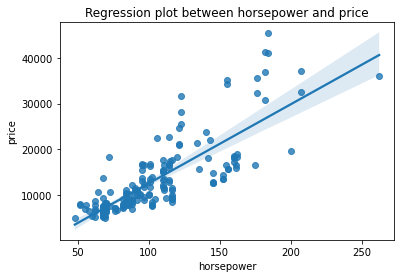

In [28]:
sns.regplot(x=df['horsepower'], y=df['price']).set_title('Regression plot between horsepower and price');

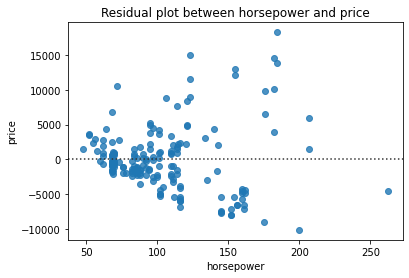

In [29]:
sns.residplot(x=df['horsepower'], y=df['price']).set_title('Residual plot between horsepower and price');

# City-mpg

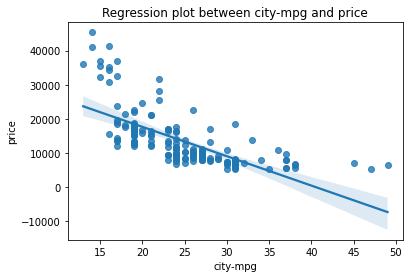

In [30]:
sns.regplot(x=df['city-mpg'], y=df['price']).set_title('Regression plot between city-mpg and price');

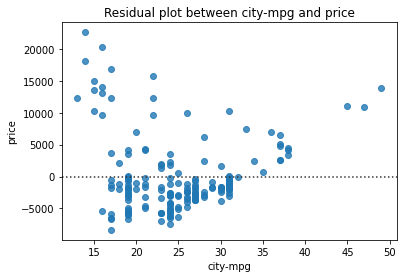

In [31]:
sns.residplot(x=df['city-mpg'], y=df['price']).set_title('Residual plot between city-mpg and price');

## Highway-mpg

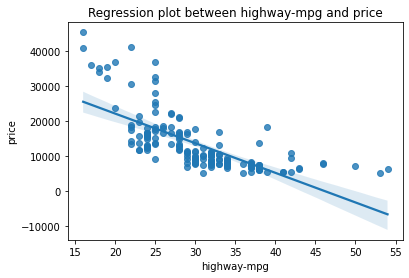

In [32]:
sns.regplot(x=df['highway-mpg'], y=df['price']).set_title('Regression plot between highway-mpg and price');

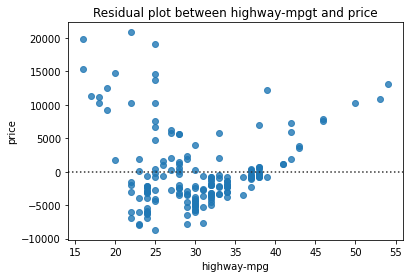

In [33]:
sns.residplot(x=df['highway-mpg'], y=df['price']).set_title('Residual plot between highway-mpgt and price');

## Wheel-base

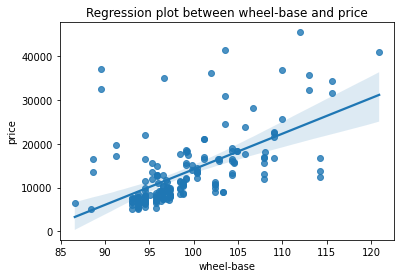

In [34]:
sns.regplot(x=df['wheel-base'], y=df['price']).set_title('Regression plot between wheel-base and price');

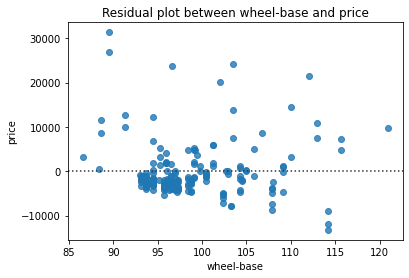

In [35]:
sns.residplot(x=df['wheel-base'], y=df['price']).set_title('Residual plot between wheel-base and price');

## Bore

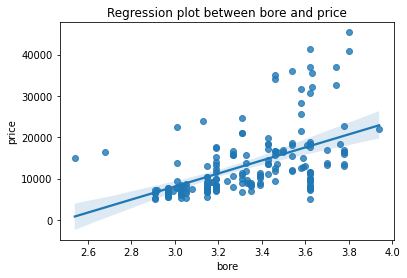

In [36]:
sns.regplot(x=df['bore'], y=df['price']).set_title('Regression plot between bore and price');

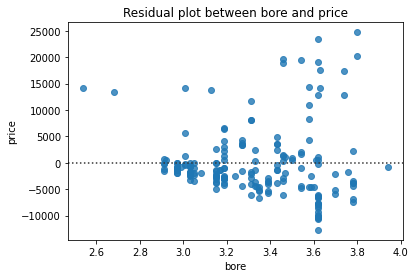

In [37]:
sns.residplot(x=df['bore'], y=df['price']).set_title('Residual plot between bore and price');

#Câu 5. Dựa vào residual plot của câu 4, chuẩn đoán xem feature nào có thể phát triển theo phương pháp hồi quy tuyến tính? Giải thích lý do.

feature: 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg' , 'length' , 'width' , 'city-mpg' , 'wheel-base' , 'bore' không phù hợp phát triển theo phương pháp hồi quy tuyến tính. Vì các điểm tập trung chủ yếu ở 1 phía và nằm rải rác khá xa ở phía bên còn lại của trục x thay vì nằm rải rác 1 cách ngẫu nhiên

#Câu 6. Xây dựng mô hình hồi quy đa biến cho các feature sau 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'.

In [42]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(z,df['price'])

LinearRegression()

In [43]:
Yhat = lm.predict(z)

In [44]:
from numpy import square
from sklearn.metrics import mean_squared_error
r = mean_squared_error(df['price'],Yhat,squared=False)

In [45]:
np.sqrt(r)

59.34527260182706

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


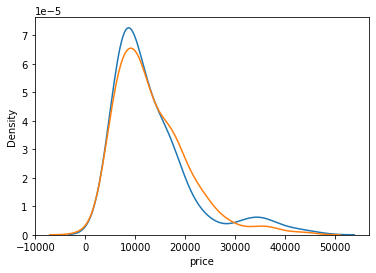

In [46]:
ax1 = sns.distplot(df['price'],hist = False,label = 'Actual Value')
sns.distplot(Yhat,hist = False, label = 'Fitted Values',ax = ax1)

#Câu 7. Xây dựng mô hình hồi quy đa biến cho các feature sau ' horsepower ', 'highway-mpg'.

In [47]:
z = df[['horsepower', 'highway-mpg']]
lm.fit(z,df['price'])

LinearRegression()

In [48]:
Yhat2 = lm.predict(z)

In [49]:
r = mean_squared_error(df['price'],Yhat,squared=False)

In [50]:
np.sqrt(r)

59.34527260182706

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


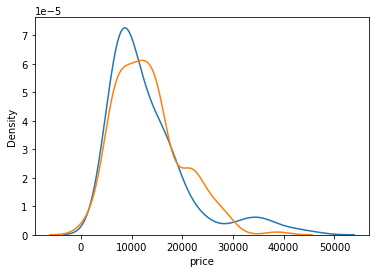

In [51]:
ax1 = sns.distplot(df['price'],hist = False, label = 'Actual Value')
sns.distplot(Yhat2,hist = False, label = 'Fitted Values',ax = ax1)

#Câu 8. Xây dựng mô hình hồi quy đa biến cho các feature được cho là quan trọng.

In [52]:
cor = df.corr()

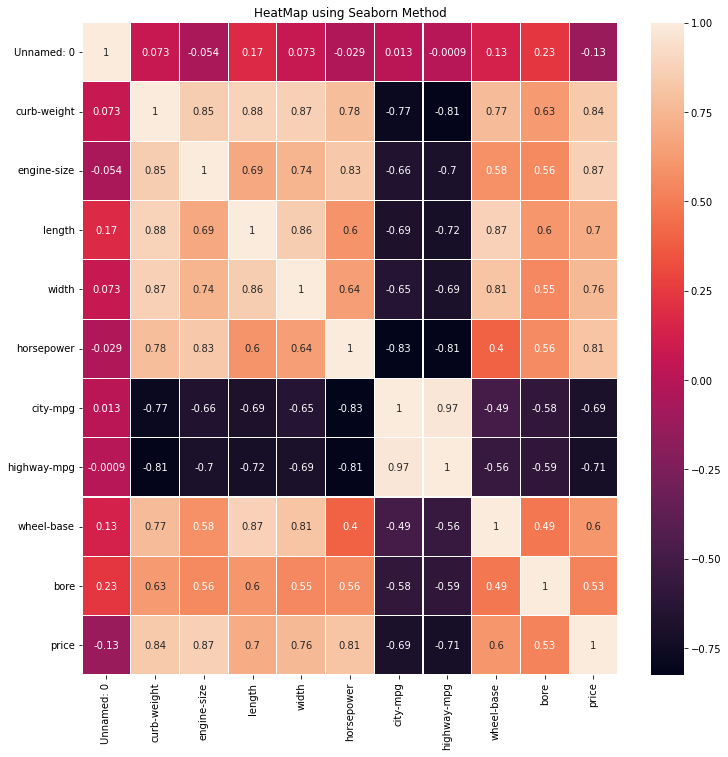

In [53]:
plt.figure(figsize=(12,12))
heat_map = sns.heatmap( cor, linewidth = 0.1 , annot = True)
plt.title( "HeatMap using Seaborn Method" )
plt.show()

In [94]:
#lẤY LÙI GIÁ TRỊ SAU UNNAMED
a = cor['price'].sort_values(ascending=False)[-2:].index

In [93]:
a

Index(['engine-size', 'curb-weight', 'horsepower', 'width', 'length',
       'wheel-base', 'bore', 'Unnamed: 0', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [108]:
b = cor['price'].sort_values(ascending=True)[-4:].index
b

Index(['horsepower', 'curb-weight', 'engine-size', 'price'], dtype='object')

In [112]:
df1 = pd.merge(df[a], df[b], left_index=True, right_index=True)

In [114]:
df1.drop(['price'],axis = 1,inplace = True)
df1

,city-mpg,highway-mpg,horsepower,curb-weight,engine-size
0,31,38,68.0,1967,90
1,18,22,115.0,2824,136
2,21,28,110.0,2695,121
3,25,32,88.0,2405,122
4,34,36,56.0,2275,110
...,...,...,...,...,...
175,24,30,116.0,2714,146
176,17,23,200.0,3139,181
177,31,37,69.0,2037,97
178,24,28,114.0,3042,141


In [119]:
z = df1
lm.fit(z,df['price'])

LinearRegression()

In [120]:
Yhat3 = lm.predict(z)

In [122]:
r = mean_squared_error(df['price'],Yhat,squared=False)

In [123]:
np.sqrt(r)

59.34527260182706

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


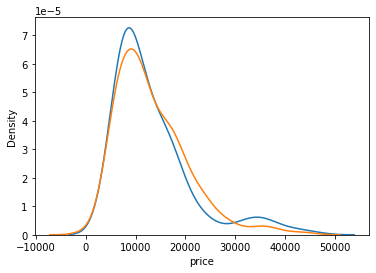

In [125]:
ax1 = sns.distplot(df['price'],hist = False, label = 'Actual Value')
sns.distplot(Yhat3,hist = False, label = 'Fitted Values',ax = ax1)

#Câu 9. Phát họa distribution plot thể hiện giữa giá trị thực và giá trị dự đoán từ các mô hình đã xây dựng.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "'city-mpg''horsepower''curb-weight''engine-size''highway-mpg' C8")

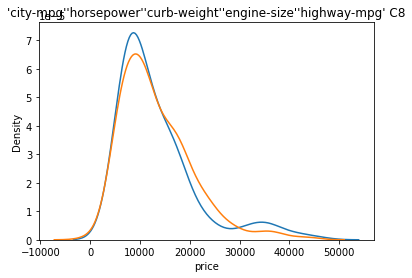

In [126]:
ax1 = sns.distplot(df['price'],hist = False, label = 'Actual Value')
sns.distplot(Yhat3,hist = False, label = 'Fitted Values',ax = ax1)
plt.title("'city-mpg''horsepower''curb-weight''engine-size''highway-mpg' C8")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "'horsepower', 'curb-weight', 'engine-size', 'highway-mpg' (cau 6)")

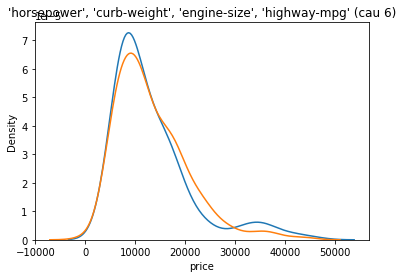

In [127]:
ax1 = sns.distplot(df['price'],hist = False,label = 'Actual Value')
sns.distplot(Yhat,hist = False, label = 'Fitted Values',ax = ax1)
plt.title("'horsepower', 'curb-weight', 'engine-size', 'highway-mpg' (cau 6)")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "'horsepower', 'highway-mpg'(cau 7)")

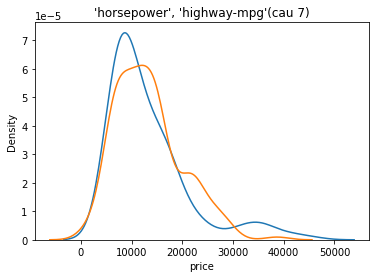

In [129]:
ax1 = sns.distplot(df['price'],hist = False, label = 'Actual Value')
sns.distplot(Yhat2,hist = False,  label = 'Fitted Values',ax = ax1)
plt.title("'horsepower', 'highway-mpg'(cau 7)")

#Câu 10. Dựa vào các distribution plot và residual plot nhận xét xem các feature nào là quan trọng để phát triển mô hình. 

Nhận xét: Ta có thể thấy rằng các feature quan trọng để phát triển mô hình: 'city-mpg''horsepower''curb-weight''engine-size''highway-mpg. Bởi vị có ảnh hưởng đến giá và khi dự đoán có kết quả khả quan hơn.

# Câu 11. *Viết hàm trả về kết quả dự đoán từ một hoặc nhiều feature thuộc 'curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore'.

In [130]:
def kw(**kwargs):
  d = []
  for key, value in kwargs.items():
        d.append(value)
  z = df[d]
  lm.fit(z,df['price'])
  Yhat = lm.predict(z)
  return Yhat

In [131]:
Yhat_4 =kw(first='city-mpg',second='horsepower',third='curb-weight',four='engine-size',five='highway-mpg')

In [132]:
r = mean_squared_error(df['price'],Yhat,squared=False)

In [133]:
np.sqrt(r)

59.34527260182706

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


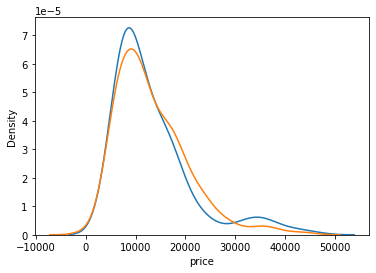

In [134]:
ax1 = sns.distplot(df['price'],hist = False, label = 'Actual Value')
sns.distplot(Yhat_4,hist = False, label = 'Fitted Values',ax = ax1)